<a href="https://colab.research.google.com/github/Elsiekiprop/Dating-App-Recommender/blob/main/Phase_5_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pata Mchumba Dating App Recommender

`Group Members`

1. Fred Mutuma
2. Elsie Kiprop
3. Oscar Karuga
4. Iain Mosima
5. Peter Kigotho
6. Benson Muriu


## Business Understanding.
In the recent years, Kenyans have embraced the idea of dating apps. Pata Mchumba, a dating site has approached us

##Data Understanding

The attributes of the data are as follows:
* Age- age of the dating site user
* Status- whether a user is married, single, available or seeing someone
* Orientation
* Diet- whether they have any diet restrictions such as vegetarians.
* Drinks- Frequency of alcohol intake
* Drugs- whether they use drugs and the frequency of usage
* Education- education level
* Ethnicity- race
* Height- how tall they are
* Smokes- whether and when they smoke
* Income- income level
* Job- the type of job done
* Location- where user lives

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

!pip install tabulate
from tabulate import tabulate

!pip install pandas-profiling
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

#Importing dataset

dating_df = pd.read_csv('/content/drive/MyDrive/okcupid_profiles.csv')

In [4]:
#First 5 rows of the data set
dating_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [5]:
#Checking for the shape of the data
print("Number of rows:", dating_df.shape[0])
print("Number of columns:", dating_df.shape[1],'\n')

Number of rows: 59946
Number of columns: 31 



The dataset has 59946 rows and 31 columns

In [6]:
# Loop to check for missing values and unique values per column 
data_info = []
for i, column in enumerate(dating_df.columns):
    data_info.append([column, len(pd.unique(dating_df[column].values)), np.sum(pd.isnull(dating_df[column]))])

print(tabulate(data_info, headers=['Feature','No of unique values', 'No of null values']),"\n")   

Feature        No of unique values    No of null values
-----------  ---------------------  -------------------
age                             54                    0
status                           5                    0
sex                              2                    0
orientation                      3                    0
body_type                       13                 5296
diet                            19                24395
drinks                           7                 2985
drugs                            4                14080
education                       33                 6628
ethnicity                      218                 5680
height                          61                    3
income                          13                    0
job                             22                 8198
last_online                  30123                    0
location                       199                    0
offspring                       16              

The table above shows missing values per column and unique values per column. A number of columns have quite a huge number of missing values that we will deal with eventually in the notebook.

### Gender Distribution.


In [7]:
#Function that will help in allocating percentages to different features in our plots.
def feature_percentage(plot, variable):
    total = len(variable)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


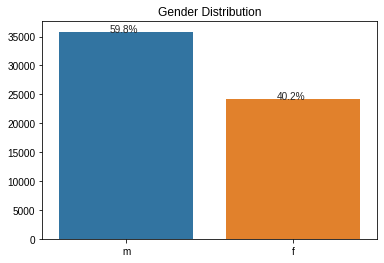

In [8]:
gender = dating_df['sex'].value_counts()
ax=sns.barplot(gender.index, gender.values)
plt.title('Gender Distribution')

plt.style.use('seaborn')
feature_percentage(ax,dating_df)
plt.show()

59.8% of the users are male while 40.2% are female.

### Distribution of age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


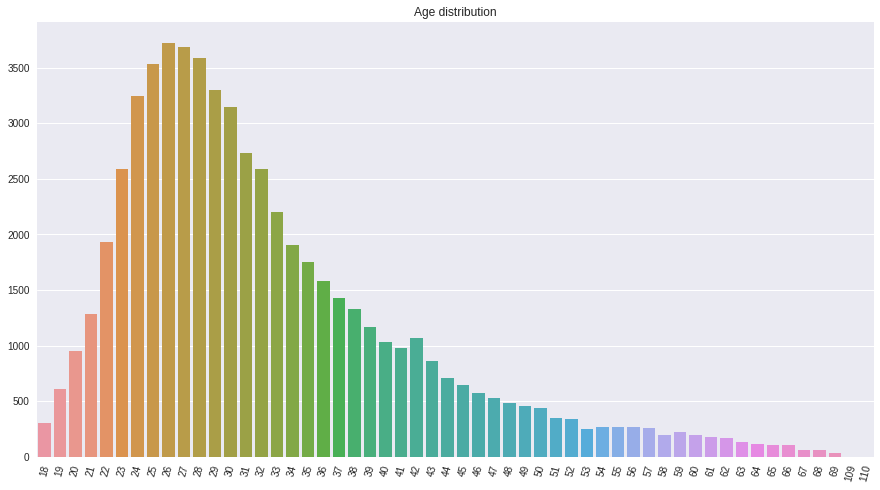

In [9]:
#Plot showing age distribution
#plt.hist(x=dating_df.age)
age= dating_df['age'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(age.index, age.values)
plt.title('Age distribution')
plt.style.use('seaborn')
plt.xticks(rotation=75)
plt.show()

From the plot above, majority of the users are aged 26. With an unexpected age of 109 and 110 each having the lowest number of users at 1 each.

In [10]:
#Checking for the minimum age and maximum age
print("min age:", dating_df['age'].min())
print("max age:", dating_df['age'].max())

min age: 18
max age: 110


The oldest user is 110 which is somehow unexpected while the youndest user is 18

In [11]:
# Binning the ages to allow for better visualization
dating_df['age']=pd.cut(x=dating_df['age'],bins=list(range(18,110,5)))

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x1440 with 0 Axes>

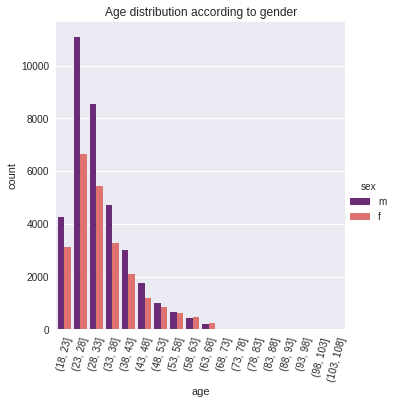

In [12]:
#Plotting the age distribution
plt.figure(figsize=(10,20))
sns.catplot(x='age', data= dating_df, kind='count',palette='magma',hue='sex')
plt.xticks(rotation=75)
plt.title('Age distribution according to gender')
plt.show

Majority of the users of this app are male. Most of them are aged 23 to 28. That same age bracket holds the highest number of female users.

### Investiging orientation count
In this section we will investigate orientation count based on each gender.

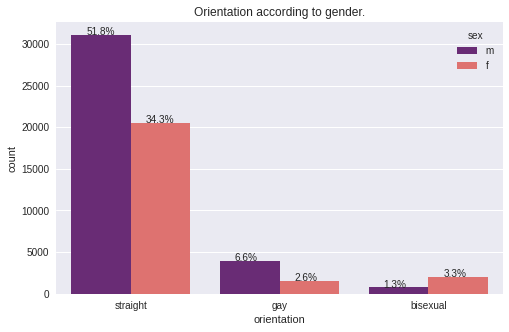

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='orientation', data=dating_df, hue='sex', palette='magma',order=dating_df['orientation'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Orientation according to gender.')
feature_percentage(ax,dating_df)
plt.show()

Majority of the users are of the orientation straight. Most of the straight users are male. This is the same case for the gay orientation For the bisexual orientation, majority are female.

### Investigating the offspring column
In this section we check whether a user has children or not.

In [14]:
dating_df['offspring'].value_counts()

doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

From the above we can see that most of the users do not have kids. Agood nu,ber would love to have kids. The above information will be demonstrated in the plot below.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


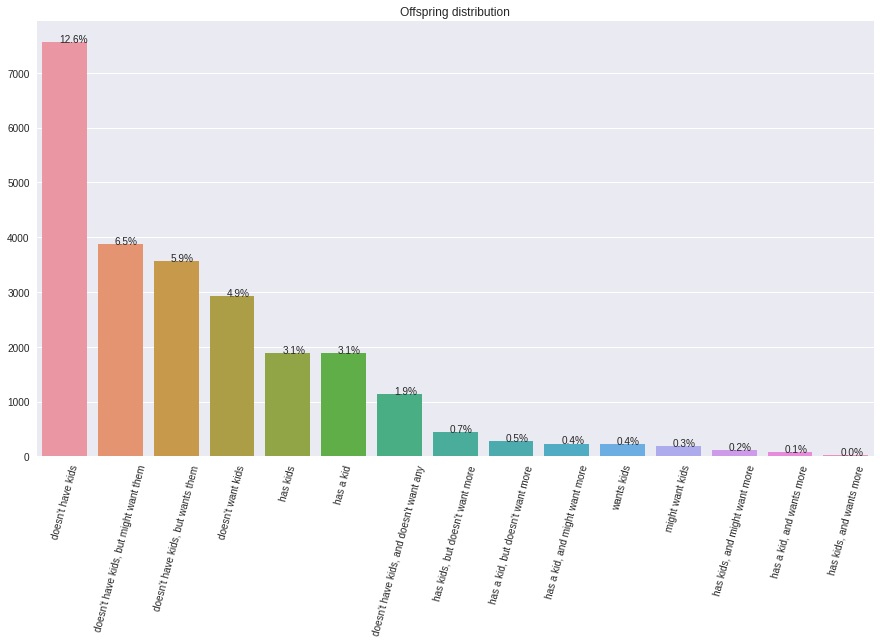

In [15]:
kids= dating_df['offspring'].value_counts()
plt.figure(figsize=(15,8))
ax= sns.barplot(kids.index, kids.values)
plt.title('Offspring distribution')
plt.style.use('seaborn')
feature_percentage(ax,dating_df)
plt.xticks(rotation=75)
plt.show()

### Investigating drug usage
In this section we investigate 3 columns i.e `drugs`, `drinks` and `smokes`


In [16]:
#Drugs column
dating_df['drugs'].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

From the above information majority of the users do not drink while the minority drink often. We will visualize this in the plot below

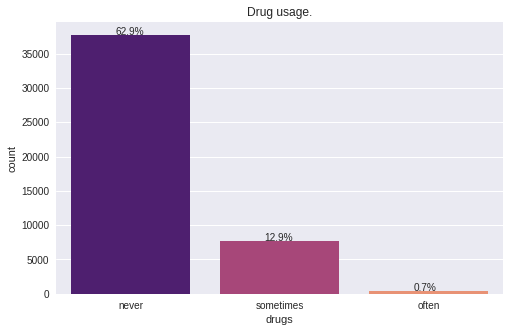

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drugs', data=dating_df,  palette='magma',order=dating_df['drugs'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Drug usage.')
feature_percentage(ax,dating_df)
plt.show()

It is evident that majority of the users(62.9%) do not do drugs

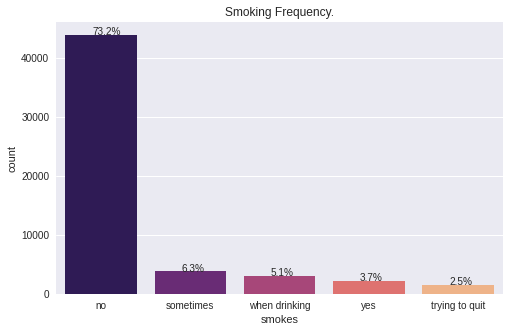

In [18]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='smokes', data=dating_df,  palette='magma',order=dating_df['smokes'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Smoking Frequency.')
feature_percentage(ax,dating_df)
plt.show()

73.2% of the dating app users do no smoke while those trying to quit take the lowest percentage at 2.5%

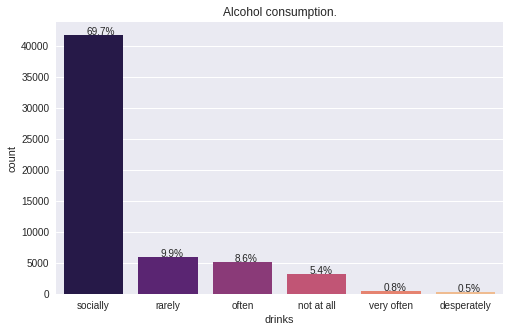

In [19]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drinks', data=dating_df,  palette='magma',order=dating_df['drinks'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Alcohol consumption.')
feature_percentage(ax,dating_df)
plt.show()

It is evident that majority of these people are social drinkers(69.7%).

### Income Distribution.


In [20]:
dating_df['income']

0            -1
1         80000
2            -1
3         20000
4            -1
          ...  
59941        -1
59942        -1
59943    100000
59944        -1
59945        -1
Name: income, Length: 59946, dtype: int64

During the cleaning, it will be very prudent to deal with the `-1` value.

### Diet prefernces


In [21]:
dating_df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

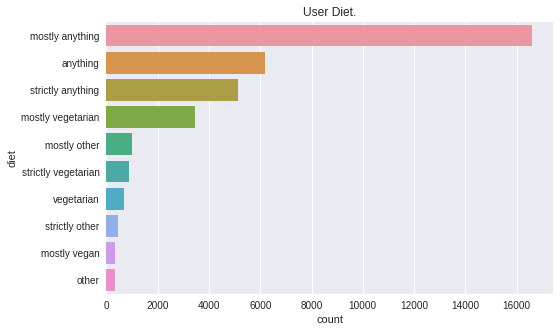

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y='diet', data=dating_df,order=dating_df['diet'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('User Diet.')

plt.show()

Majority of the people have no diet constraints.